## 5.8 K-Nearest Neighbours

Odległość euklidesowa:
d(A, B) = (suma od 1 do N (xiA - xiB)^2)^1/2

In [1]:
import pandas as pd
import numpy as np

Podstawowym algorytmem opartym o sąsiedztwow jest algorytm KNN. Jego ideą jest odnalezienie K najbliższych sąsiadów dla danej obserwacji, a następnie przypisanie mu klasy na podstawie najpopularniejszej etykiety w obrębie tych właśnie najbliższych wektorów. Idea jest bardzo prosta, a samo uczenie modelu niezmiernie szybkie.

<Axes: xlabel='x', ylabel='y'>

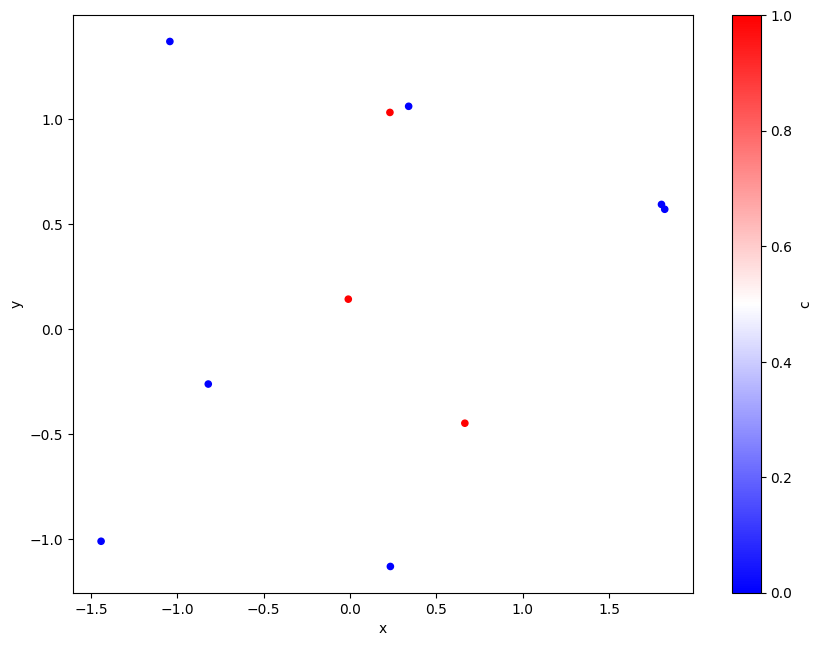

In [2]:
np.random.seed(49)
xy_df = pd.DataFrame({
    "x": np.random.normal(size=10),
    "y": np.random.normal(size=10),
    "c": np.random.choice([0, 1], size=10, p=[.75, .25])
})
xy_df.plot.scatter(x="x", y="y", c="c", cmap="bwr", figsize=(10.0, 7.5))

In [3]:
xy_df.describe()

,x,y,c
count,10.000000,10.000000,10.000000
mean,0.178074,0.191598,0.300000
std,1.093662,0.878519,0.483046
min,-1.441583,-1.128953,0.000000
25%,-0.618123,-0.401045,0.000000
50%,0.232511,0.356104,0.000000
75%,0.583764,0.921051,0.750000
max,1.822627,1.367844,1.000000


In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
X, y = xy_df.drop(columns="c"), xy_df["c"]

In [6]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [7]:
x_test = np.linspace(-2, 2, 1000)
y_test = np.linspace(-2, 2, 1000)

In [8]:
import matplotlib.pyplot as plt

In [10]:
xx, yy = np.meshgrid(x_test, y_test)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


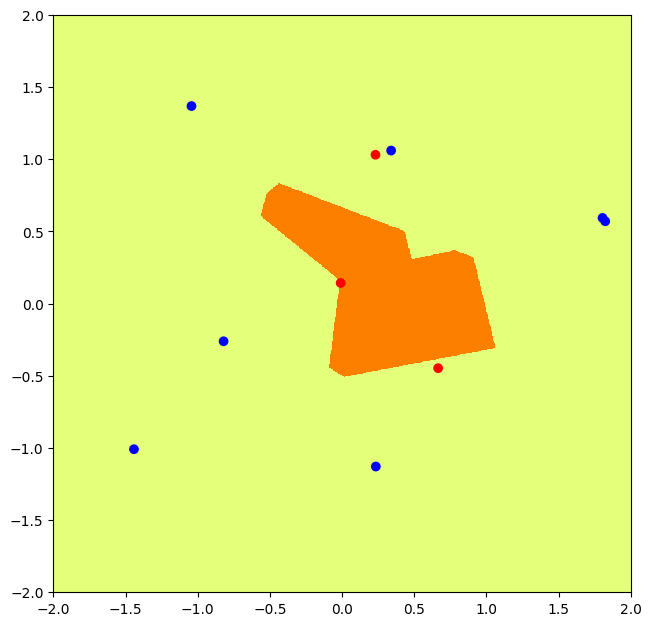

In [11]:
plt.figure(figsize=(7.5, 7.5))
plt.imshow(Z, interpolation="nearest", extent=(-2, 2, -2, 2), cmap="Wistia", origin="lower")
plt.scatter(xy_df["x"], xy_df["y"], c=xy_df["c"], cmap="bwr")